In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
file_path = 'Data.csv'
data = pd.read_csv(file_path)

# Create a datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Reset the index
data.reset_index(inplace=True)

data['id'] = data.index

data.set_index('id', inplace=True)

cycle_data = data['cycle']
cycle_dates = data['date']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

train_ratio = 0.85
split_idx = int(len(cycle_dates) * train_ratio)
train_dates = cycle_dates.iloc[:split_idx]
test_dates = cycle_dates.iloc[split_idx:]

In [31]:
# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()
ses_aic = ses_model.aic

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()
holt_aic = holt_model.aic

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_aic = hw_model.aic

# Compare AIC values
print("Simple Exponential Smoothing (SES) AIC:", ses_aic)
print("Double Exponential Smoothing (Holt's Method) AIC:", holt_aic)
print("Triple Exponential Smoothing (Holt-Winters Method) AIC:", hw_aic)

# Select the model with the lowest AIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.aic)

# Forecasting with the selected model
forecast = best_model.forecast(steps=len(test_data))


Simple Exponential Smoothing (SES) AIC: -19617.678594621444
Double Exponential Smoothing (Holt's Method) AIC: -32646.372603515058
Triple Exponential Smoothing (Holt-Winters Method) AIC: -32629.58166413192


In [32]:
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Reset the index
data.reset_index(inplace=True)

data['id'] = data.index

data.set_index('id', inplace=True)



data['date']

id
0      2013-01-20
1      2013-01-21
2      2013-01-22
3      2013-01-23
4      2013-01-24
          ...    
3653   2023-01-21
3654   2023-01-22
3655   2023-01-23
3656   2023-01-24
3657   2023-01-25
Name: date, Length: 3658, dtype: datetime64[ns]

Simple Exponential Smoothing (SES) AIC: -19617.678594621444
Double Exponential Smoothing (Holt's Method) AIC: -32646.372603515058
Triple Exponential Smoothing (Holt-Winters Method) AIC: -32629.58166413192
Mean Absolute Error: 25.73
Mean Squared Error: 858.86
Root Mean Squared Error: 29.31


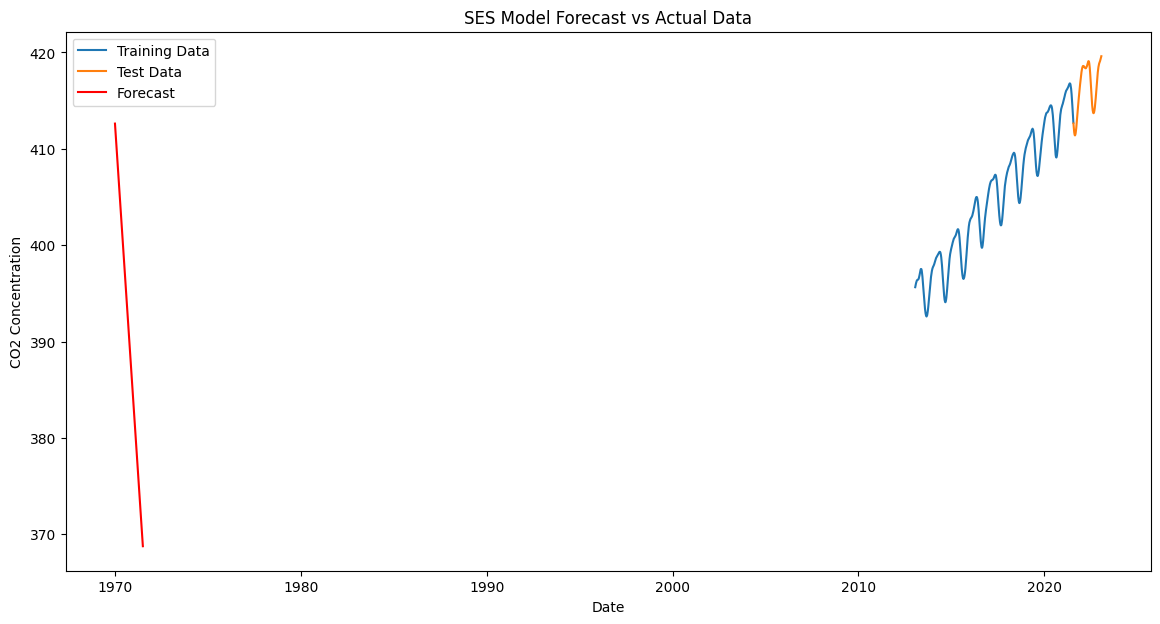

In [33]:
# Load the dataset

data = pd.read_csv(file_path)

# Create a datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Reset the index
data.reset_index(inplace=True)

data['id'] = data.index

data.set_index('id', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']
cycle_dates = data['date']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

train_ratio = 0.85
split_idx = int(len(cycle_dates) * train_ratio)
train_dates = cycle_dates.iloc[:split_idx]
test_dates = cycle_dates.iloc[split_idx:]

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()

# Evaluate model fit using AIC
ses_aic = ses_model.aic
holt_aic = holt_model.aic
hw_aic = hw_model.aic

# Compare AIC values
print("Simple Exponential Smoothing (SES) AIC:", ses_aic)
print("Double Exponential Smoothing (Holt's Method) AIC:", holt_aic)
print("Triple Exponential Smoothing (Holt-Winters Method) AIC:", hw_aic)

# Select the model with the lowest AIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.aic)

# Forecasting with the selected model
forecast = best_model.forecast(steps=len(test_data))

# Convert forecast to a numpy array
forecast_values = np.array(forecast)

# Create datetime index for forecasted values
forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(test_data)+1, freq='D')[1:]

# Evaluation
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


# Select the model with the lowest BIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.bic)

# Convert index to a list of timestamps

forecast_dates_np = np.array(forecast_dates)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_data.values, label='Training Data')
plt.plot(test_dates, test_data.values, label='Test Data')
plt.plot(forecast_dates_np, forecast_values, label='Forecast', color='red')
plt.title('SES Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


In [34]:
# Load the dataset
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()

# Evaluate model fit using BIC
ses_bic = ses_model.bic
holt_bic = holt_model.bic
hw_bic = hw_model.bic

# Compare BIC values
print("Simple Exponential Smoothing (SES) BIC:", ses_bic)
print("Double Exponential Smoothing (Holt's Method) BIC:", holt_bic)
print("Triple Exponential Smoothing (Holt-Winters Method) BIC:", hw_bic)

# Select the model with the lowest BIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.bic)

# Forecasting with the selected model
forecast = best_model.forecast(steps=len(test_data))

# Convert forecast to a numpy array
forecast_values = np.array(forecast)

# Create datetime index for forecasted values
forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(test_data)+1, freq='D')[1:]

# Evaluation
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Simple Exponential Smoothing (SES) BIC: -19605.594481801327
Double Exponential Smoothing (Holt's Method) BIC: -32622.204377874823
Triple Exponential Smoothing (Holt-Winters Method) BIC: -32532.908761570983
Mean Absolute Error: 25.73
Mean Squared Error: 858.86
Root Mean Squared Error: 29.31


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


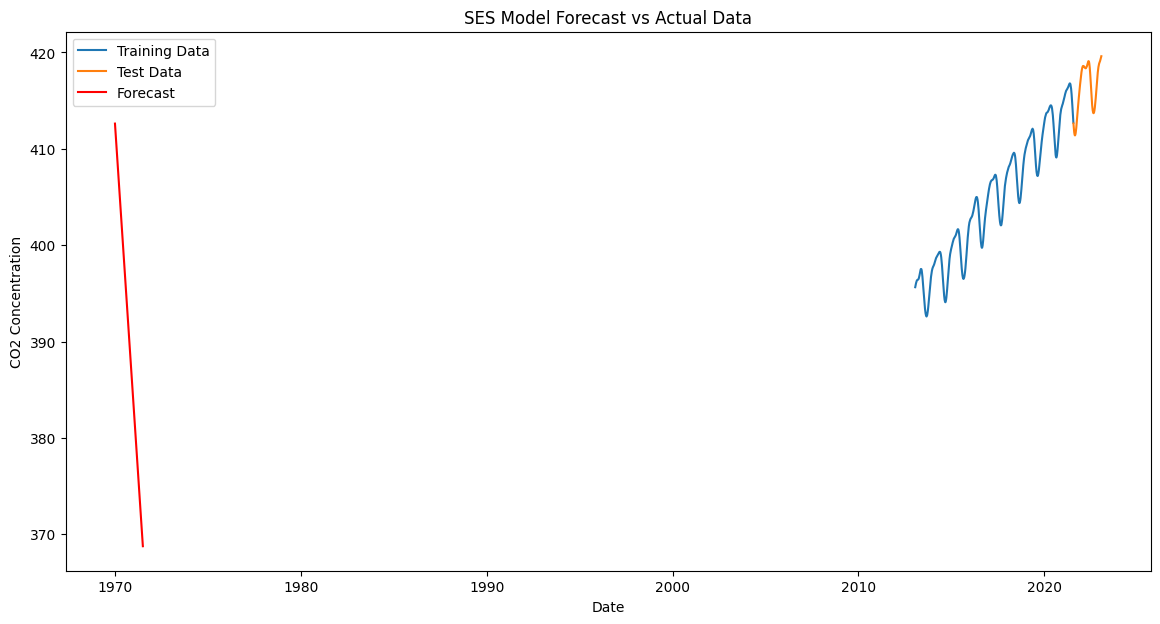

In [35]:
# Load the dataset
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()


# Create datetime index for forecasted values
forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(test_data)+1, freq='D')[1:]

# Convert index and values of test_data to numpy arrays
test_dates = np.array(test_data.index)
test_values = np.array(test_data.values)

# Convert index and values of test_data to numpy arrays
test_dates_np = np.array(test_data.index)
test_values_np = np.array(test_data.values)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_data.values, label='Training Data')
plt.plot(test_dates_np, test_values_np, label='Test Data')
plt.plot(forecast_dates_np, forecast_values, label='Forecast', color='red')
plt.title('SES Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

In [36]:
from sklearn.model_selection import TimeSeriesSplit

# Define the number of folds for cross-validation
n_splits = 5

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store evaluation metrics
mae_scores = []
mse_scores = []
rmse_scores = []

# Perform Time Series Cross-Validation
for train_index, val_index in tscv.split(train_data):
    # Split data into training and validation sets
    X_train, X_val = train_data.iloc[train_index], train_data.iloc[val_index]

    # Fit the model on the training data
    Best_model_aic = min((ses_model, holt_model, hw_model), key=lambda x: x.aic)
    model = Best_model_aic

    # Make predictions on the validation data
    forecast = model.forecast(steps=len(X_val))

    # Calculate evaluation metrics
    mae = mean_absolute_error(X_val, forecast)
    mse = mean_squared_error(X_val, forecast)
    rmse = np.sqrt(mse)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate average scores
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)

# Print average scores
print("Average MAE:", avg_mae)
print("Average MSE:", avg_mse)
print("Average RMSE:", avg_rmse)

Average MAE: 16.723199177410645
Average MSE: 412.4646344823747
Average RMSE: 19.949303101695588


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


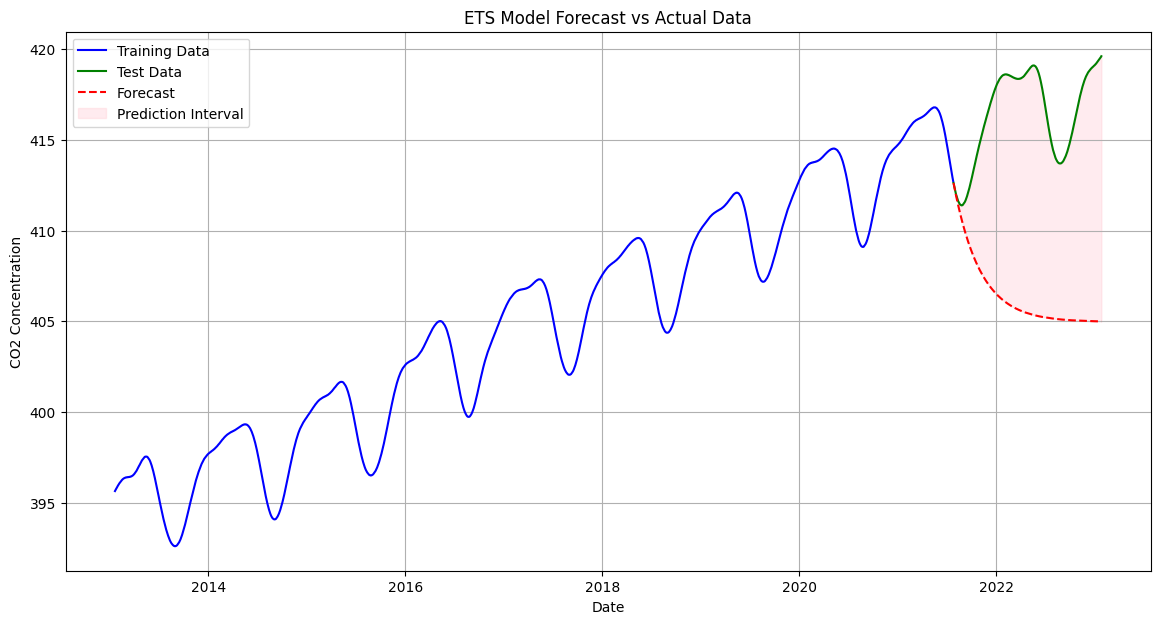

In [37]:
# Load the dataset
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit a Triple Exponential Smoothing model
ets_model = ExponentialSmoothing(train_data,
                                 seasonal='mul',
                                 seasonal_periods=12,
                                 trend='add',
                                 damped_trend=True,
                                 use_boxcox=True).fit()

# Forecasting
forecast = ets_model.forecast(steps=len(test_data))

# Converting data to numpy arrays for plotting to avoid indexing issues
train_dates = np.array(train_data.index)
train_values = np.array(train_data.values)
test_dates = np.array(test_data.index)
test_values = np.array(test_data.values)
forecast_values = np.array(forecast)

# Plotting using matplotlib, ensuring all data types are explicitly handled
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_values, label='Training Data', color='blue', linestyle='-')
plt.plot(test_dates, test_values, label='Test Data', color='green', linestyle='-')
plt.plot(test_dates, forecast_values, label='Forecast', color='red', linestyle='--')
plt.fill_between(test_dates, test_values, forecast_values, color='pink', alpha=0.3, label='Prediction Interval')
plt.title('ETS Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Forecasting
forecast = ets_model.forecast(steps=len(test_data))

# Evaluation
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 10.08
Mean Squared Error: 117.42
Root Mean Squared Error: 10.84
